# Gradient Boosting Machines - GBM

### Boosting Yöntemlerine Giriş
- Zayıf öğrenicileri bir araya getirip güçülü bir öğrenici ortaya çıkarmak fikrine dayanır.
- Kötü tahmin, gerçek değerler ile tahmin edilen değerlerin farkının karelerinin alınması sonucunda ortaya çıkan büyük değerlerdir.
- Kötü Tahminde bulunan ağaçlar da zayıf tahminciler(öğreniciler)dir.
#### AdaBoost - (Adaptive Boosting)
- Zayıf sınıflandırıcların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır.
## Gradient Boosting Machines-GBM
- **Amaç**, Hata kareler ortalaması(MSE) minimum yapacak şekilde katsayılar ya da karar kuralları bulmaktır.
- GBM, AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.
- GBM,Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
- Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının(residuals) üzerine kurularak(fit) oluşturulur.
- GBM, diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient Descent Algoritmasını kullanmaktadır.
- GBM, bir çok temel öğrenici tipi (baselearner type) kullanabilir.(Trees,Liner terms, Splines...)
- Cost fonksiyonları ve link fonksiyonları modifiye edilebilir.
- GBM, Boosting Algoritması + Gradient Descent olarak görülmektedir.

**Gerekli Kütüphaneler** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import  neighbors
from sklearn.svm import SVR

In [2]:
# Uyarı Mesajları ile Karşılaşmamak için bu kütüphaneyi kullanıyoruz.
from warnings import filterwarnings
filterwarnings("ignore")

# Gradient Boosting Mahines(GBM) - Model ve Tahmin İşlemleri 

In [14]:
df = pd.read_csv("./Hitters.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df = df.dropna()

# Veri seti içerisindeki kategorik değişkenleri dummy değişkenlere çeviriyoruz.
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

# bağımlı değişken
y = df[["Salary"]]

# Veri Setinin içerisinden Bağımlı Değişkeni ve Kategorik değişkenlerin ilk hallerini dışarı bırakıyoruz.
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

# dms ile X_ birleştirip(concat) bağımsız değişken oluşturduk.
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)

# train ve test setlerimizi oluşturuyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state= 42) 

**Model**

In [15]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
gbm_model

GradientBoostingRegressor()

In [16]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\users\halil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
    loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'quantile'
    allows quantile regression (use `alpha` to specify the quantile).

learning_rate : float, default=0.1
    learning rate shrinks the contribution of

**Tahmin**

In [17]:
y_pred = gbm_model.predict(X_test)

In [22]:
#ilkel hatamız
print("ilkel hata:",np.sqrt(mean_squared_error(y_test,y_pred)))

ilkel hata: 353.3215423988472


## Model Tuning

In [23]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
gbm_model

GradientBoostingRegressor()

In [24]:
gbm_params = {"learning_rate":[0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [25]:
gbm_cv_model = GridSearchCV(gbm_model,
                            gbm_params, 
                            cv=10,
                            n_jobs=-1,
                            verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  4.8min finished


In [26]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 8,
 'n_estimators': 500,
 'subsample': 0.8}

**Final Modeli**

In [27]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,
                                      loss="lad",
                                      max_depth=8,
                                      n_estimators=500,
                                      subsample=0.8).fit(X_train,y_train)

In [29]:
y_tuned_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_tuned_pred))

319.52637678654753

## Değişken Önem Düzeyi

In [30]:
# değişkenlerin önemleri
gbm_tuned.feature_importances_*100

array([6.51265274, 6.12566262, 4.57818618, 6.03055191, 7.78635418,
       7.04725029, 3.76085383, 4.11590357, 4.96011889, 6.43594855,
       5.28381214, 6.15672565, 6.58676059, 8.82439433, 7.35039083,
       5.66644498, 0.79780804, 1.18396704, 0.79621363])

In [31]:
X_train.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [32]:
y_test.columns

Index(['Salary'], dtype='object')

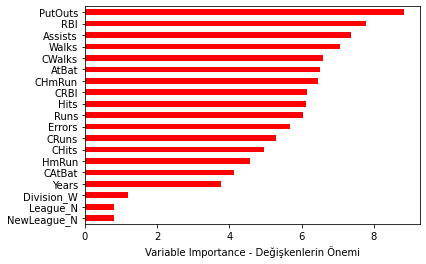

In [33]:
#Importance isimli bir dataframe oluşturuyoruz.
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100},
                         index=X_train.columns)
# Importance dataframe indejş değerleri sıralıyoruz.
Importance.sort_values(by='Importance',# Importance sütununa göre yapıyoruz
                      axis = 0, # satır bazında bir sıralama olmasını sağlıyoruz.
                      ascending = True).plot(kind = 'barh', # sütun gragiği
                                             color ='r')
plt.xlabel("Variable Importance - Değişkenlerin Önemi")
plt.gca().legend_ = None